In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/cars_synthetic.csv')
df.head(2)

type  color  year  length condition    width  weight  price
0  Standard  White  2019    2.96   New Car  2.40829  3251.0  11777
1       SUV  Black  2010    3.34   Average  2.84068  3277.0   6006

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      998 non-null    object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     900 non-null    object 
 7   price      1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [4]:
df["weight"]=pd.to_numeric(df["weight"],errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1000 non-null   object 
 1   color      998 non-null    object 
 2   year       1000 non-null   int64  
 3   length     1000 non-null   float64
 4   condition  1000 non-null   object 
 5   width      1000 non-null   float64
 6   weight     899 non-null    float64
 7   price      1000 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


In [6]:
df["length"].describe()

count    1000.000000
mean        4.094950
std        17.565614
min         0.000000
25%         2.990000
50%         3.130000
75%         3.300000
max       334.000000
Name: length, dtype: float64

In [7]:
df["color"].isna().sum()

2

In [8]:
df.dropna(subset=["color"],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       998 non-null    object 
 1   color      998 non-null    object 
 2   year       998 non-null    int64  
 3   length     998 non-null    float64
 4   condition  998 non-null    object 
 5   width      998 non-null    float64
 6   weight     897 non-null    float64
 7   price      998 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 70.2+ KB


<Axes: ylabel='Frequency'>

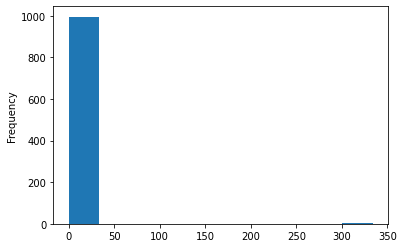

In [10]:
df["length"].plot.hist()

In [11]:
#use where to replace length values above 100 with nan
df["length"]=np.where(df["length"]>100,np.nan,df["length"])

<Axes: ylabel='Frequency'>

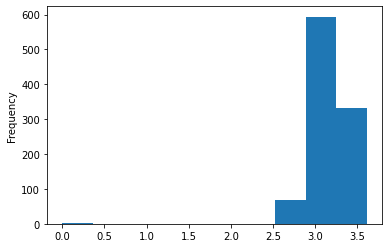

In [12]:
df["length"].plot.hist()

In [13]:
df["length"]=np.where(df["length"]<1.5,np.nan,df["length"])

<Axes: ylabel='Frequency'>

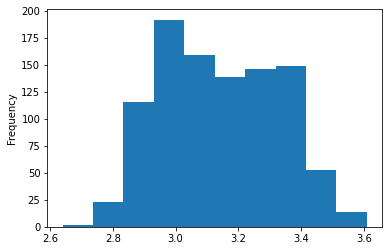

In [14]:
df["length"].plot.hist()

<Axes: ylabel='Frequency'>

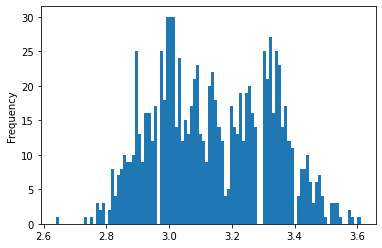

In [15]:
df["length"].plot.hist(bins=100)

<Axes: ylabel='Density'>

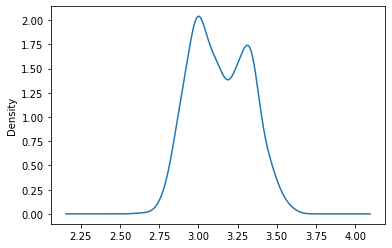

In [16]:
df["length"].plot.kde()

In [17]:
px.scatter(df.dropna(),x="year",y="price",symbol="type",size="weight",color="color",size_max=8)

In [18]:
px.scatter(df.dropna(),x="year",y="price",symbol="type",size="weight",color="color",size_max=8,log_y=True)

<Axes: ylabel='Frequency'>

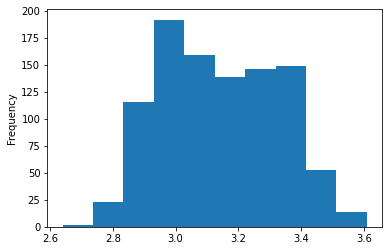

In [19]:
df["length"].plot.hist()

<Axes: ylabel='Frequency'>

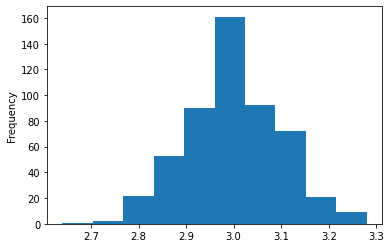

In [20]:
df[df["type"]=="Standard"]["length"].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

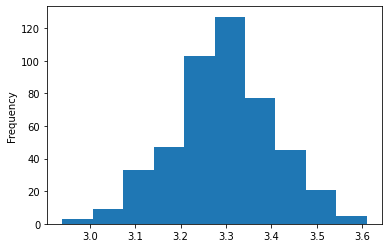

In [21]:
df[df["type"]=="SUV"]["length"].plot.hist(bins=10)

In [22]:
stats.shapiro(df["length"].dropna())

ShapiroResult(statistic=0.976589024066925, pvalue=1.4712533275007544e-11)

In [23]:
stats.shapiro(df[df["type"]=="SUV"]["length"].dropna())

ShapiroResult(statistic=0.9939078092575073, pvalue=0.056312475353479385)

In [24]:
stats.shapiro(df[df["type"]=="Standard"]["length"].dropna())

ShapiroResult(statistic=0.9967994093894958, pvalue=0.39144009351730347)

## Normality test interpretation
* We visually see that the first plot does not look bell-shaped, indeed the statistical test output a very low p-value: we can reject the null hypothesis that the data is normally distribution
* For the two other cases, the pvalue is above the standard 0.05 threshold, although we see that in the SUV case, we are close to the limit.
* In reality, I have indeed generated following a power law for SUV and standard.

In [25]:
df_numerical = df.select_dtypes(include=np.number).dropna()
df_numerical.head(2)

year  length    width  weight  price
0  2019    2.96  2.40829  3251.0  11777
1  2010    3.34  2.84068  3277.0   6006

In [26]:
df_numerical.std()

year         6.420206
length       0.181991
width        0.323124
weight     314.919413
price     3940.987976
dtype: float64

In [27]:
df_numerical.var()

year      4.121905e+01
length    3.312086e-02
width     1.044092e-01
weight    9.917424e+04
price     1.553139e+07
dtype: float64

In [28]:
df_numerical.cov()

year     length       width        weight         price
year       41.219050  -0.008387   -0.212691     45.657277  1.296598e+04
length     -0.008387   0.033121    0.003191     34.173489  7.766115e+01
width      -0.212691   0.003191    0.104409      0.430505 -6.312713e+02
weight     45.657277  34.173489    0.430505  99174.236761  9.292613e+04
price   12965.984919  77.661147 -631.271250  92926.131190  1.553139e+07

### Interpreting Covariance matrix
* We check that the diagonal of the covariance matrix is indeed composed of the values of variance

In [29]:
df_numerical.corr()

year    length     width    weight     price
year    1.000000 -0.007178 -0.102525  0.022582  0.512450
length -0.007178  1.000000  0.054266  0.596265  0.108280
width  -0.102525  0.054266  1.000000  0.004231 -0.495726
weight  0.022582  0.596265  0.004231  1.000000  0.074874
price   0.512450  0.108280 -0.495726  0.074874  1.000000

In [30]:
# We check that we can recompute a corr value from the cov and the var, here for (year,length)
-0.008387/np.sqrt(3.312086e-02*4.121905e+01)


-0.0071780561538577195

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='length', ylabel='year'>,
        <Axes: xlabel='width', ylabel='year'>,
        <Axes: xlabel='weight', ylabel='year'>,
        <Axes: xlabel='price', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='length'>,
        <Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='width', ylabel='length'>,
        <Axes: xlabel='weight', ylabel='length'>,
        <Axes: xlabel='price', ylabel='length'>],
       [<Axes: xlabel='year', ylabel='width'>,
        <Axes: xlabel='length', ylabel='width'>,
        <Axes: xlabel='width', ylabel='width'>,
        <Axes: xlabel='weight', ylabel='width'>,
        <Axes: xlabel='price', ylabel='width'>],
       [<Axes: xlabel='year', ylabel='weight'>,
        <Axes: xlabel='length', ylabel='weight'>,
        <Axes: xlabel='width', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>,
        <Axes: xlabel='price', ylabel='weight'>],
       [<Axes: xlabel='year

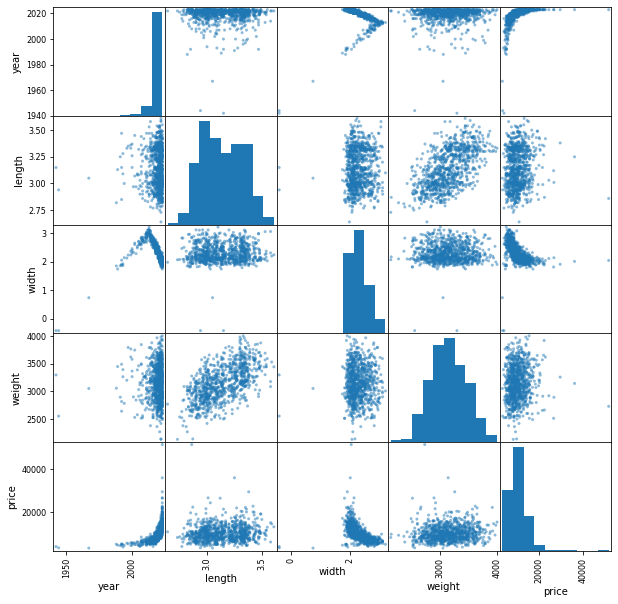

In [34]:
pd.plotting.scatter_matrix(df_numerical,figsize=(10,10))

In [36]:
df_numerical.corr(method="spearman")

year    length     width    weight     price
year    1.000000 -0.049290 -0.828910 -0.001053  0.859819
length -0.049290  1.000000  0.054189  0.595787  0.123320
width  -0.828910  0.054189  1.000000 -0.006749 -0.698222
weight -0.001053  0.595787 -0.006749  1.000000  0.104615
price   0.859819  0.123320 -0.698222  0.104615  1.000000

## Nonlinear relationship
We observe visually that price and year, for instance, have a nonlinear relationship, or year and width
* Indeed the relation between year and pice is now considered much stronger, because it is monotonic
* The relation between width and year is still problematic, because it is not monotonic


## Changing the backend

In [32]:
pd.options.plotting.backend = "plotly"
df["length"].plot.hist()

In [33]:
pd.options.plotting.backend = "matplotlib"
